<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Linear Regression, KNN, Decision Tree, Logistic Regression, SVM</font></h1>


## **Import the required libraries**


In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

### Importing the Dataset


In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv')

df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


### Data Preprocessing


#### Transforming Categorical Variables


First, we need to convert categorical variables to binary variables. We will use pandas `get_dummies()` method for this.


In [4]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.


In [5]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

### Training Data and Test Data


Now, we set our 'features' or x values and our Y or target variable.


In [6]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [7]:
df_sydney_processed = df_sydney_processed.astype(float)

In [8]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

### Linear Regression


In [9]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2)

In [10]:
LinearReg = LinearRegression()
LinearReg.fit(x_train, y_train)
print(LinearReg.coef_)
print(LinearReg.intercept_)

[-2.76723039e-02  9.43856981e-03  1.23172059e-03  7.74459796e-03
 -3.66150078e-02  3.71692660e-03  1.42885117e-03  1.64388254e-03
  1.39133756e-03  9.05689937e-03  5.88029579e-03 -7.81473118e-03
 -1.18835385e-02  1.18180441e-02  1.73493925e-02  1.15131467e-04
 -3.33264119e+10 -3.33264119e+10  1.52403389e+09  1.52403389e+09
  1.52403389e+09  1.52403389e+09  1.52403389e+09  1.52403389e+09
  1.52403389e+09  1.52403389e+09  1.52403389e+09  1.52403389e+09
  1.52403389e+09  1.52403389e+09  1.52403389e+09  1.52403389e+09
  1.52403389e+09  1.52403389e+09  8.27225784e+09  8.27225784e+09
  8.27225784e+09  8.27225784e+09  8.27225784e+09  8.27225784e+09
  8.27225784e+09  8.27225784e+09  8.27225784e+09  8.27225784e+09
  8.27225784e+09  8.27225784e+09  8.27225784e+09  8.27225784e+09
  8.27225784e+09  8.27225784e+09  6.96225548e+09  6.96225548e+09
  6.96225548e+09  6.96225548e+09  6.96225548e+09  6.96225548e+09
  6.96225548e+09  6.96225548e+09  6.96225548e+09  6.96225548e+09
  6.96225548e+09  6.96225

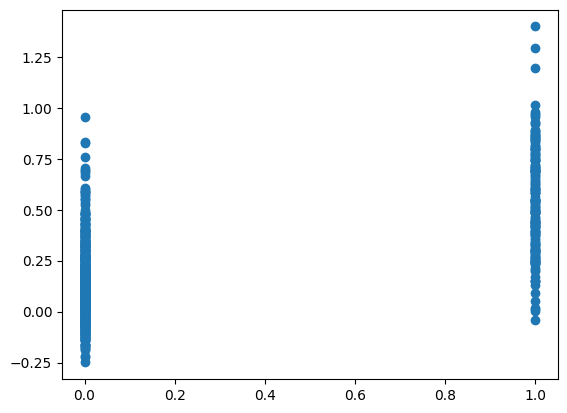

In [11]:
predictions = LinearReg.predict(x_test)
plt.scatter(y_test, predictions)

In [12]:
LinearRegression_MAE = metrics.mean_absolute_error(y_test, predictions)
LinearRegression_MSE = metrics.mean_squared_error(y_test, predictions)
LinearRegression_R2 = metrics.r2_score(y_test, predictions)

In [13]:
Report = {"Metrics":["MAE","MSE","R2"],"Result": [LinearRegression_MAE,LinearRegression_MSE,LinearRegression_R2]}
pd.DataFrame(Report)

,Metrics,Result
0,MAE,0.255841
1,MSE,0.115259
2,R2,0.400252


### KNN


In [14]:
KNN = KNeighborsClassifier(n_neighbors = 4)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [15]:
predictions = KNN.predict(x_test)[0:5] 
predictions

array([0., 0., 0., 0., 0.])

### Decision Tree


In [42]:
Tree =  DecisionTreeClassifier().fit(x_train, y_train)

In [43]:
predictions = Tree.predict(x_test)

In [44]:
Tree_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
Tree_JaccardIndex = metrics.jaccard_score(y_test, predictions)
Tree_F1_Score = metrics.f1_score(y_test, predictions)

### Logistic Regression


In [45]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=1)

In [46]:
LR = LogisticRegression(solver="liblinear").fit(x_train, y_train)

In [47]:
predictions = LR.predict(x_test)

In [48]:
LR_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
LR_JaccardIndex = metrics.jaccard_score(y_test, predictions)
LR_F1_Score = metrics.f1_score(y_test, predictions)
LR_Log_Loss = metrics.log_loss(y_test, predictions)

### SVM


In [49]:
SVM = svm.SVC().fit(x_train, y_train)

In [50]:
predictions = SVM.predict(x_test)

In [51]:
SVM_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
SVM_JaccardIndex = metrics.jaccard_score(y_test, predictions)
SVM_F1_Score = metrics.f1_score(y_test, predictions)

# Created By~
## Sambhav Srivastava 
### Sambhavsrivastava2401@gmail.com